# Experimenting with RNN

* The goal of this notebook is to provide some basic intuition on the diffrences between two types of deep neural networks. And to encourage you to test different deep learning architectures. This experiment has been run on a NVIDIA GeForce GTX 970 but shouldn't have any problem with using CPU only.

* This experiment is written in Python with the help of the libraries tensorflow and keras, the model code exist on a different file to make this easier to run. See the DeepLearningModels.py file for full code.

### Feedforward and Recurrent neural networks

Feedforward neural networks can approximate any continuous function, but only in the interval where there is enough density of training data ([Universal approximation theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem)). Unlike feedforward neural networks, RNNs can use their internal states (memory) which is used to store information from the input and the histories.

**Method**: We generate two diffrent sine waves and multiply them to create the wave we want to predict. The dataset consists of two periods of 100 samples. We train two models, a Feedforward neural network and an RNN on this dataset. We send the predicted values back to the model to follow if the model has learned the function.

**Hypothesis**: Feedforward neural networks accuracy is expected to go down for every period, while  RNN would remember.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from DeepLearningModels import ModelFullyConnected, ModelRNN, sine_wave

### Sine wave

In [3]:
wave_1 = sine_wave(nsamples=50, periods=1, repeat=2)
wave_2 = sine_wave(nsamples=50, periods=2, repeat=2)
data = wave_1*wave_2

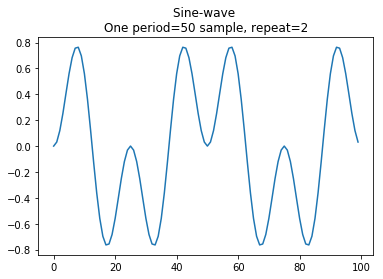

In [4]:
plt.title('Sine-wave \nOne period=50 sample, repeat=2')
plt.plot(data)
plt.show()

### Create features and targets

In [4]:
time_back = 10
time_forward = time_back
batch_size = 1

In [5]:
dataX, dataY = [], []
for i in range(len(data)-time_back-time_forward):
    dataX.append(data[i:i+time_back])
    dataY.append(data[i+time_back:i+time_back+time_forward])
dataX = np.array(dataX)
dataY = np.array(dataY)

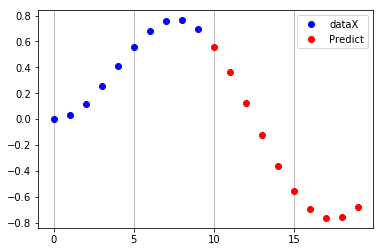

In [6]:
ax = plt.figure().gca()

ax.plot(range(time_forward), dataX[0], 'bo', label='dataX')
ax.plot(range(time_forward, 2*time_forward), dataY[0], 'ro', label='Predict')

ax.xaxis.set_major_locator(MaxNLocator(5, integer=True))
plt.legend()
plt.grid(axis='x')

In [7]:
dataX = dataX.reshape(len(dataX), batch_size, time_back)
print('dataX:', dataX.shape,'\ndataY:', dataY.shape, sep='')

dataX:(80, 1, 10)
dataY:(80, 10)


## Creat the models

In [8]:
fc_model = ModelFullyConnected(batch_size, dataX.shape, dataY.shape)
rnn_model = ModelRNN(batch_size, dataX.shape, dataY.shape)

#### Fully connected neural network

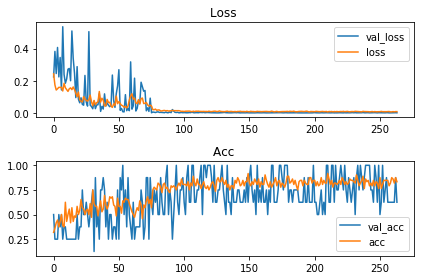

In [23]:
fc_model.create_model(nr_layers=3, units=30)
fc_model.fit(dataX, dataY)
fc_model.plot_training()

#### SimpleRNN

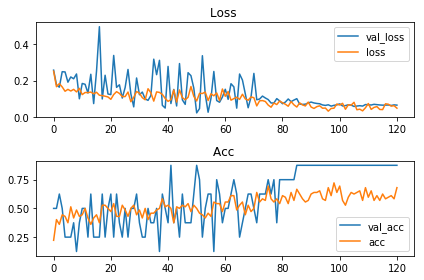

In [34]:
rnn_model.create_model(nr_layers=3, units=20)
rnn_model.fit(dataX, dataY)
rnn_model.plot_training()

#### Plot

In [35]:
plot_fc = fc_model.plot_predict(dataX[0:1], time_forward, len_range=100)
plot_rnn = rnn_model.plot_predict(dataX[0:1], time_forward, len_range=100)
plot_full = []
while len(plot_fc) > len(plot_full):
    plot_full.extend(data)

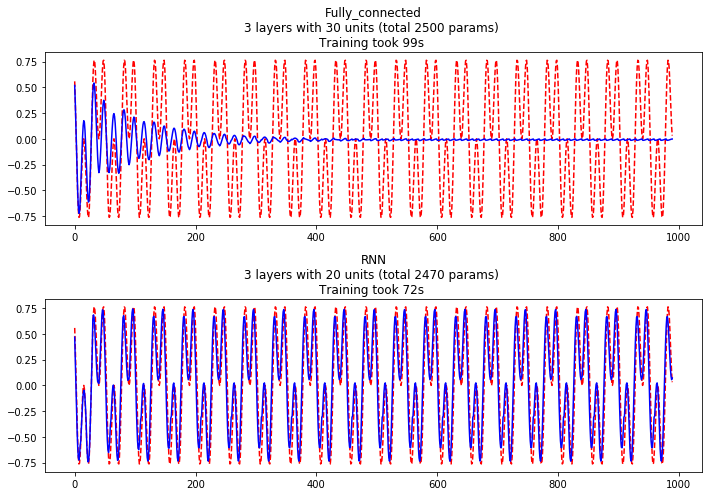

In [36]:
plt.figure(figsize=(10, 7))

plt.subplot(211)
plt.title(fc_model.model_information())
plt.plot(plot_full[time_forward:len(plot_fc)], 'r--')
plt.plot(plot_fc[:-time_forward], 'b')

plt.subplot(212)
plt.title(rnn_model.model_information())
plt.plot(plot_full[time_forward:len(plot_fc)], 'r--')
plt.plot(plot_rnn[:-time_forward], 'b')

plt.tight_layout()
plt.show()

**Conclusion**: Feedforward neural networks are not great on data that have has a periodic quality. However, RNN are able to remember and have a "memory" about what they have "seen" before.

**Discussion**: It seems that when the Feedforward neural network model is over zero it have learned that the possibility of going down is high and up if under zero. The RNN model is remembering the amplitude and frequency.

**ToDo**: 

* Here are some ideas that I think are worth exploring:
    - Change the value "time_back", what is the lowest value (can't predict the wave function)?
    - Try different activations.
    - Try using the Stateful mode. If the model is stateful, then it can "remember" some aspects of the previous steps in the sequence.
    
    - LSTM [Vanishing gradient problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem)
    - CNN